In [9]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [10]:
from pylabel import importer

In [11]:
# Import Yolo annotations

%%capture
import os, zipfile

#Download sample yolo dataset 
os.makedirs("data", exist_ok=True)
!wget "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -O data/coco128.zip
with zipfile.ZipFile("data/coco128.zip", 'r') as zip_ref:
   zip_ref.extractall("data")

In [12]:
path_to_annotations = "data/coco128/labels/train2017/"

#Identify the path to get from the annotations to the images 
path_to_images = "../../images/train2017/"

#Import the dataset into the pylable schema 
#Class names are defined here https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml
yoloclasses = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpg", name="coco128")

dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,../../images/train2017/,000000000459.jpg,,0,516,640,3,,162.569928,278.98976,...,,,,,,27,tie,,,1
1,../../images/train2017/,000000000459.jpg,,0,516,640,3,,0.000258,84.84992,...,,,,,,0,person,,,1
2,../../images/train2017/,000000000636.jpg,,1,480,640,3,,80.71992,89.37024,...,,,,,,61,toilet,,,1
3,../../images/train2017/,000000000389.jpg,,2,640,480,3,,306.65024,300.72984,...,,,,,,27,tie,,,1
4,../../images/train2017/,000000000389.jpg,,2,640,480,3,,0.00032,256.72008,...,,,,,,0,person,,,1


In [13]:
# Analyze annotations
# Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes.

print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")


Number of images: 128
Number of classes: 71
Classes:['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'stop sign', 'bench', 'bird', 'cat', 'dog', 'horse', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'cell phone', 'microwave', 'oven', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'toothbrush']
Class counts:
person      254
car          46
cup          36
chair        35
book         29
           ... 
vase          2
bear          1
skis          1
banana        1
scissors      1
Name

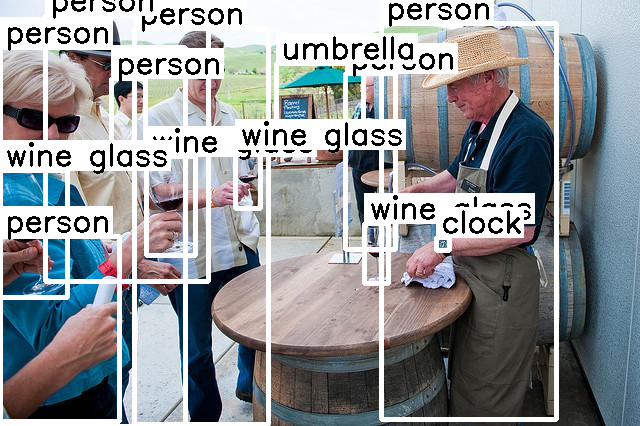

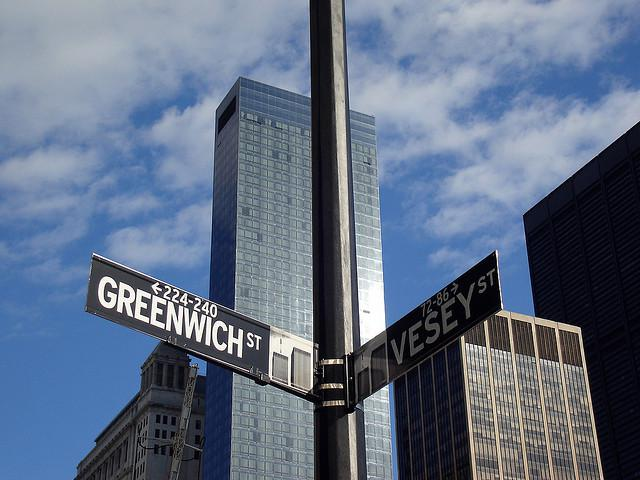

In [14]:
# Visualize Annotations

from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes(30))

In [15]:
# Export to Coco Json
# The PyLabel exporter will export all of the annotations in the dataframe to the desired target format. All annotations will be stored in a single json file.

dataset.export.ExportToCoco(cat_id_index=1)

['data/coco128/labels/train2017/coco128.json']

In [16]:
# reading the first few lines from the Json file
N = 20
with open(r'/content/data/coco128/labels/train2017/coco128.json') as f:
    for i in range(0, N):
        print(f.readline(), end = '')

{
    "images": [
        {
            "id": 0,
            "folder": "../../images/train2017/",
            "file_name": "000000000459.jpg",
            "path": null,
            "width": 516,
            "height": 640,
            "depth": 3
        },
        {
            "id": 1,
            "folder": "../../images/train2017/",
            "file_name": "000000000636.jpg",
            "path": null,
            "width": 480,
            "height": 640,
            "depth": 3
        },
